# Time Sereias Analysis model based

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
# READING THE DATA 
Cola_series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True,squeeze=True)
Cola_series.tail()

Quarter
Q2_95    4936.0
Q3_95    4895.0
Q4_95    4333.0
Q1_96    4194.0
Q2_96    5253.0
Name: Sales, dtype: float64

In [3]:
# the data is given in quarters
# as the data is low let us convert it into monthly data
# firts we are adding the datetime data as index
import datetime
datetime_series =    pd.date_range("1986-01-31", periods=42, freq="Q")
datetime_series

DatetimeIndex(['1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [4]:
# setting the index
datetime_index = pd.DatetimeIndex(datetime_series.values)

df=pd.DataFrame(Cola_series).set_index(datetime_index)

In [5]:
df.tail()
# now the data index is in timeseries format

,Sales
1995-06-30,4936.0
1995-09-30,4895.0
1995-12-31,4333.0
1996-03-31,4194.0
1996-06-30,5253.0


<AxesSubplot:>

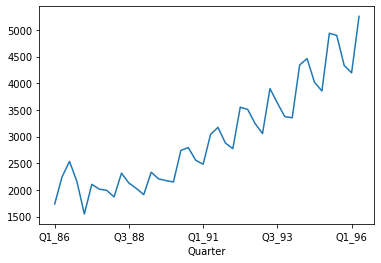

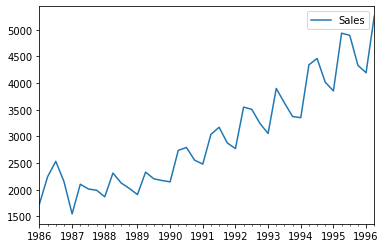

In [6]:
# plotting the data 
Cola_series.plot()
df.plot()

#### Up Sampling Data

In [7]:
# extracing date from qurter and upsampling
upsampled = df.resample('D').mean()  
print(upsampled.head())

               Sales
1986-03-31  1734.827
1986-04-01       NaN
1986-04-02       NaN
1986-04-03       NaN
1986-04-04       NaN


                  Sales
1986-03-31  1734.827000
1986-04-01  1740.432868
1986-04-02  1746.038736
1986-04-03  1751.644604
1986-04-04  1757.250472


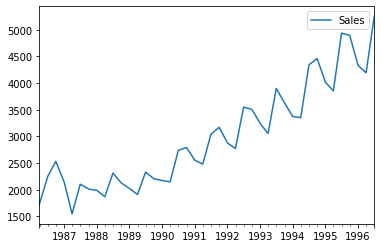

In [8]:
# Interpolate the Missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head())
interpolated.plot()
pyplot.show()

#### Down Sampling Data

In [9]:
# downsample to montly intervals

resample = interpolated.resample('M')
monthly_sales = resample.mean()
monthly_sales.head()

,Sales
1986-03-31,1734.827000
1986-04-30,1821.717956
1986-05-31,1992.696933
1986-06-30,2163.675911
1986-07-31,2295.194737


In [10]:
monthly_sales.shape

(124, 1)

In [11]:
# defining time periods time square and logdata

monthly_sales['TP']= range(1,125)
monthly_sales['TPSQ']= monthly_sales['TP']*monthly_sales['TP']
monthly_sales['Logsale']= np.log(monthly_sales['Sales'])

In [12]:
# extracing the month from datetime series 
monthly_sales["month"] = monthly_sales.index.strftime("%b")


In [13]:
monthly_sales.head()

,Sales,TP,TPSQ,Logsale,month
1986-03-31,1734.827000,1,1,7.458663,Mar
1986-04-30,1821.717956,2,4,7.507535,Apr
1986-05-31,1992.696933,3,9,7.597244,May
1986-06-30,2163.675911,4,16,7.679564,Jun
1986-07-31,2295.194737,5,25,7.738573,Jul


In [14]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 1986-03-31 to 1996-06-30
Freq: M
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sales    124 non-null    float64
 1   TP       124 non-null    int32  
 2   TPSQ     124 non-null    int32  
 3   Logsale  124 non-null    float64
 4   month    124 non-null    object 
dtypes: float64(2), int32(2), object(1)
memory usage: 4.8+ KB


In [15]:
# getting dummies for months
df = pd.get_dummies(monthly_sales, dtype = int)

## Some Visulisation

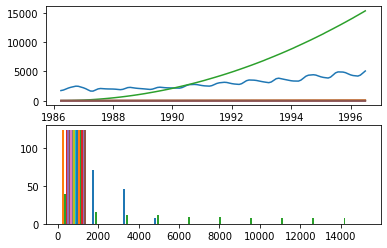

In [17]:
# line plot
pyplot.subplot(211)
pyplot.plot(df)
# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

# Splitting data

In [23]:
df.head()

,Sales,TP,TPSQ,Logsale,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
1986-03-31,1734.827000,1,1,7.458663,0,0,0,0,0,0,0,1,0,0,0,0
1986-04-30,1821.717956,2,4,7.507535,1,0,0,0,0,0,0,0,0,0,0,0
1986-05-31,1992.696933,3,9,7.597244,0,0,0,0,0,0,0,0,1,0,0,0
1986-06-30,2163.675911,4,16,7.679564,0,0,0,0,0,0,1,0,0,0,0,0
1986-07-31,2295.194737,5,25,7.738573,0,0,0,0,0,1,0,0,0,0,0,0


In [24]:
df.shape

(124, 16)

In [25]:
df.columns

Index(['Sales', 'TP', 'TPSQ', 'Logsale', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [26]:
df[['month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep']] = df[['month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep']].apply(pd.to_numeric)

In [27]:
split = len(df)-20
Train = df[0:split]
Test = df[split:]

In [28]:
print(df.shape,Train.shape, Test.shape)

(124, 16) (104, 16) (20, 16)


In [29]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 1986-03-31 to 1994-10-31
Freq: M
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales      104 non-null    float64
 1   TP         104 non-null    int32  
 2   TPSQ       104 non-null    int32  
 3   Logsale    104 non-null    float64
 4   month_Apr  104 non-null    int32  
 5   month_Aug  104 non-null    int32  
 6   month_Dec  104 non-null    int32  
 7   month_Feb  104 non-null    int32  
 8   month_Jan  104 non-null    int32  
 9   month_Jul  104 non-null    int32  
 10  month_Jun  104 non-null    int32  
 11  month_Mar  104 non-null    int32  
 12  month_May  104 non-null    int32  
 13  month_Nov  104 non-null    int32  
 14  month_Oct  104 non-null    int32  
 15  month_Sep  104 non-null    int32  
dtypes: float64(2), int32(14)
memory usage: 8.1 KB


# Building Model Based Methods

In [30]:
import statsmodels.formula.api as sm


In [31]:
# linear model
linear_model = sm.ols('Sales~TP',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['TP'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

553.0651577286292

In [41]:
#Exponential model

Exp = sm.ols('Logsale~TP',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['TP'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


408.2919116076045

In [42]:
#Quadratic model

Quad = sm.ols('Sales~TP+TPSQ',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['TP','TPSQ']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

440.5559500474784

In [43]:
#Additive seasonality 

add_sea = sm.ols('Sales~ month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1821.8906378933993

In [44]:
#Additive Seasonality Quadratic 

add_sea_Quad = sm.ols('Sales~ TP+TPSQ+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['TP', 'TPSQ','month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar','month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

273.67694613545996

In [45]:
##Multiplicative Seasonality

Mul_sea = sm.ols('Logsale~ month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
#pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1895.3391256706377

In [48]:
#Multiplicative Additive Seasonality 

Mult_add_sea = sm.ols('Logsale~ TP+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
#pred_Mult_add_sea = pd.Series(Mul_add_sea.predict(Test[['TP','month_Apr', 'month_Aug', 'month_Dec',
#       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
 #      'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
pred_Mult_add_sea = pd.Series(Mul_add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

344.56402289902326

In [49]:
#Comparing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,273.676946
6,rmse_Mult_add_sea,344.564023
1,rmse_Exp,408.291912
2,rmse_Quad,440.555950
0,rmse_linear,553.065158
3,rmse_add_sea,1821.890638
5,rmse_Mult_sea,1895.339126


In [ ]:
# additive seasonality with quadratic functiongivingthe low rmse

In [50]:
# fitting for full data
Model_full = sm.ols('Sales~ TP+TPSQ+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=df).fit()


In [134]:
Model_full.summary()
# the r square and adjusted r square are good 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     348.8
Date:                Tue, 18 May 2021   Prob (F-statistic):           6.12e-83
Time:                        23:33:12   Log-Likelihood:                -790.15
No. Observations:                 124   AIC:                             1608.
Df Residuals:                     110   BIC:                             1648.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1822.1168     38.191     47.711      0.000    1746.432    1897.802
TP            -0.0696      1.529     -0.046      0.964      -3.099       2.960
TPSQ           0.1940      0.012     16.371      0.000       0.170       0.217
month_Apr    -92.4171     43.566     -2.121      0.036    -178.755      -6.079
month_Aug    395.1802     45.620      8.662      0.000     304.772     485.589
month_Dec     74.5657     45.678      1.632      0.105     -15.957     165.088
month_Feb    -97.0813     45.715     -2.124      0.036    -187.677      -6.486
month_Jan    -20.3846     45.695     -0.446      0.656    -110.942      70.173
month_Jul    423.5544     45.609      9.287      0.000     333.167     513.941
month_Jun    336.2036     43.601      7.711      0.000     249.797     422.610
month_Mar   -166.2795     43.554     -3.818      0.000    -252.592     -79.966
month_May    122.0872     43.582      2.801      0.006      35.718     208.457
month_Nov    185.0457     45.661      4.053      0.000      94.556     275.536
month_Oct    295.1378     45.646      6.466      0.000     204.678     385.598
month_Sep    366.5046     45.632      8.032      0.000     276.072     456.938
==============================================================================
Omnibus:                        2.311   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.996
Skew:                          -0.193   Prob(JB):                        0.369
Kurtosis:                       2.513   Cond. No.                     8.28e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""